# How are coefficients affected?

In [3]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
data = load_diabetes()

In [5]:
df = pd.DataFrame(data.data,columns  = data.feature_names)
df['Target'] = data.target

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
df.shape

(442, 11)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [10]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

In [11]:
print(coefs)
print(r2_scores)

[[-9.15865318117052, -205.45432163452168, 516.6937445408248, 340.61999904554824, -895.5520019034881, 561.2206790413157, 153.89310953635814, 126.73139687845311, 861.1270015230043, 52.42112237904743], [21.174024430657028, 1.6598369427666824, 63.65982584237653, 48.49285812895809, 18.42151032381466, 12.875465784744842, -38.91543472700236, 38.84247544381298, 61.612302483834945, 35.50538301949847], [2.858979751926674, 0.6294525865756911, 7.540605233970546, 5.8499494598152495, 2.7108788069084198, 2.1421346679368303, -4.834047020128574, 5.108223464961738, 7.4484511161018, 4.576129087936828], [0.295725563591919, 0.06929029205798537, 0.7690038138539064, 0.5978244450322281, 0.28289951642978645, 0.2259355089031416, -0.49560690943379326, 0.5270313443400052, 0.7614958982209438, 0.47102907018042234]]
[0.43993386615689634, 0.15214327672566985, 0.010378115936827137, -0.010136670498663625]


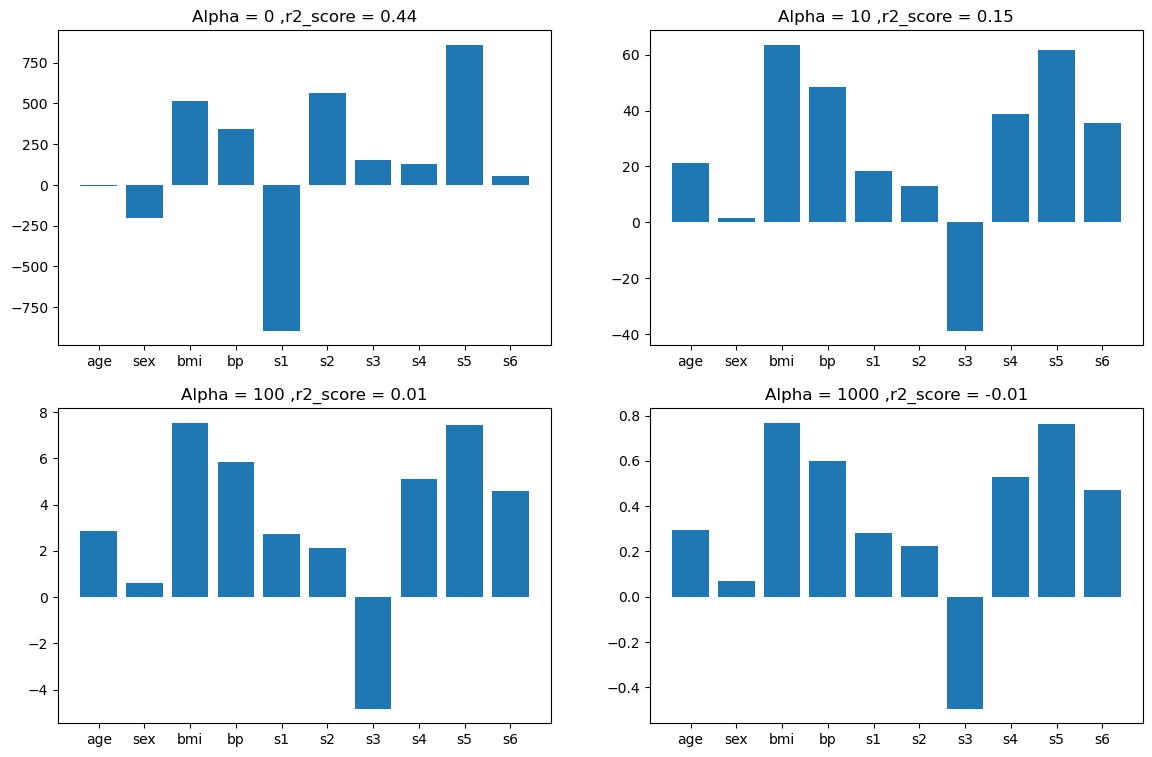

In [12]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))
plt.show()

In [13]:
# So, we can we that the values of all the coefficient are shrinking when the value of alpha is updating

# Higher Coefficients are affected more

In [14]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [17]:
input_array = np.array(coefs)
input_array[0]

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [22]:
df = pd.DataFrame(input_array,columns = data.feature_names)
df['Alpha'] = alphas

df.set_index(df['Alpha'])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Alpha
Alpha,,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122,0.0000
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916,0.0001
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349,0.0010
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221,0.0100
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091,0.1000
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692,1.0000
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383,10.0000
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129,100.0000
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029,1000.0000


In [24]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [27]:
input_array = np.array(coefs).T
input_array

array([[  -9.15865318,   -9.11611927,   -8.95264833,   -8.76148719,
          -7.54973811,    6.64373321,   32.98691016,   42.24252786,
          32.15601075,   21.17402443],
       [-205.45432163, -205.32921903, -204.85489009, -204.31340446,
        -201.20302014, -172.23747375,  -99.63712406,  -57.30448273,
          -2.56175965,    1.65983694],
       [ 516.69374454,  516.88966361,  517.60886178,  518.38060848,
         521.51859779,  485.52958514,  363.41789029,  282.1721254 ,
         109.75754328,   63.65982584],
       [ 340.61999905,  340.54943644,  340.27987257,  339.96792595,
         338.06565078,  314.67584612,  247.23913192,  198.0593951 ,
          82.25851871,   48.49285813],
       [-895.5520019 , -883.42387206, -838.09138818, -787.7005103 ,
        -534.14911525,  -72.94020918,   -5.37159656,   14.36373444,
          25.5137752 ,   18.42151032],
       [ 561.22067904,  551.55958217,  515.44217307,  475.28218117,
         272.95146134,  -80.58868817,  -54.58724938,  -22

In [29]:
input_array.shape

(10, 10)

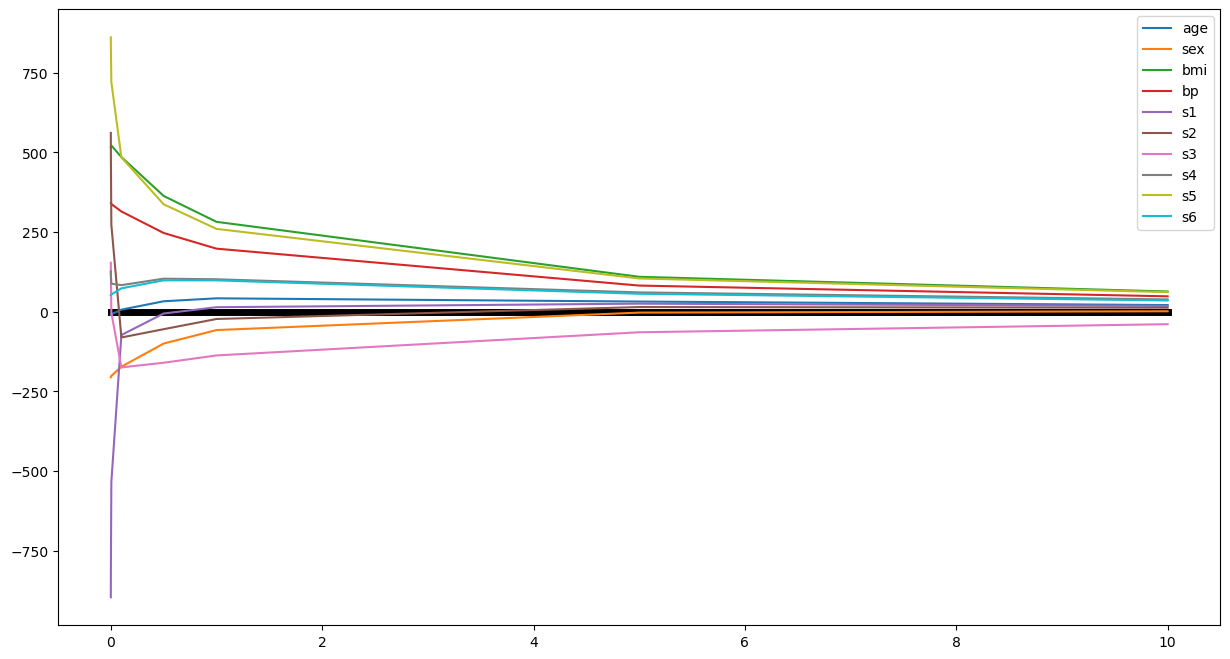

In [30]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

In [31]:
# So, we can say that the higher the coefficient is, the reduct amount is high than the lower value of coefficients.

# Impact on Bias and Variance

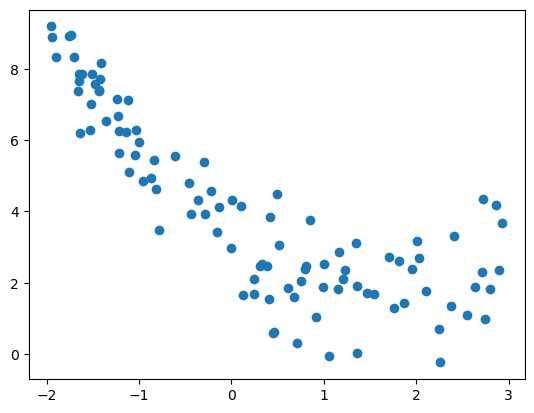

In [46]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
!pip install mlxtend

In [50]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

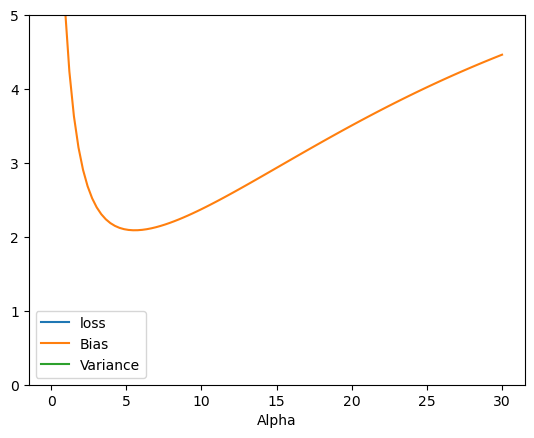

In [51]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

# Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


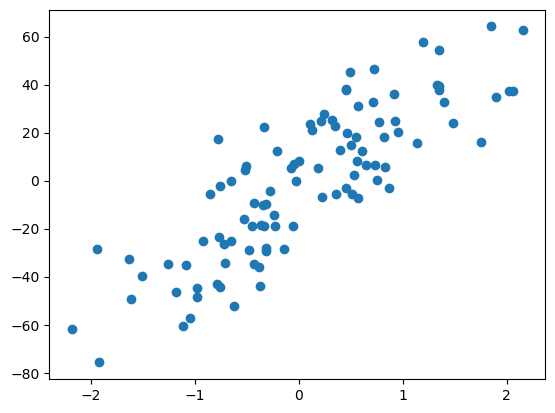

In [53]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [54]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [55]:
def predict(m):
    return m*X - 2.29

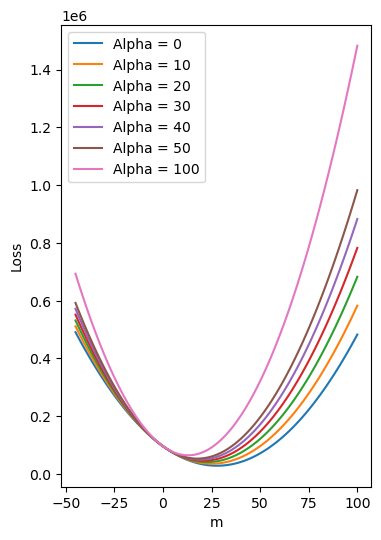

In [59]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='Alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Its getting shrink and reducing the value of coeffecients and close to 0